In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
data = sm.datasets.longley.load_pandas().data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOTEMP   16 non-null     float64
 1   GNPDEFL  16 non-null     float64
 2   GNP      16 non-null     float64
 3   UNEMP    16 non-null     float64
 4   ARMED    16 non-null     float64
 5   POP      16 non-null     float64
 6   YEAR     16 non-null     float64
dtypes: float64(7)
memory usage: 1.0 KB


In [5]:
data.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


| Column    | Meaning                        |
| --------- | ------------------------------ |
| `TOTEMP`  | Total employment (target)      |
| `GNPDEFL` | GNP deflator (inflation proxy) |
| `GNP`     | Gross National Product         |
| `UNEMP`   | Number of unemployed           |
| `ARMED`   | Armed forces                   |
| `POP`     | Population                     |
| `YEAR`    | Time index                     |


In [6]:
data.describe()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,65317.000000,101.681250,387698.437500,3193.312500,2606.687500,117424.000000,1954.500000
std,3511.968356,10.791553,99394.937795,934.464247,695.919604,6956.101561,4.760952
min,60171.000000,83.000000,234289.000000,1870.000000,1456.000000,107608.000000,1947.000000
25%,62712.500000,94.525000,317881.000000,2348.250000,2298.000000,111788.500000,1950.750000
50%,65504.000000,100.600000,381427.000000,3143.500000,2717.500000,116803.500000,1954.500000
75%,68290.500000,111.250000,454085.500000,3842.500000,3060.750000,122304.000000,1958.250000
max,70551.000000,116.900000,554894.000000,4806.000000,3594.000000,130081.000000,1962.000000


In [7]:
# Time plots

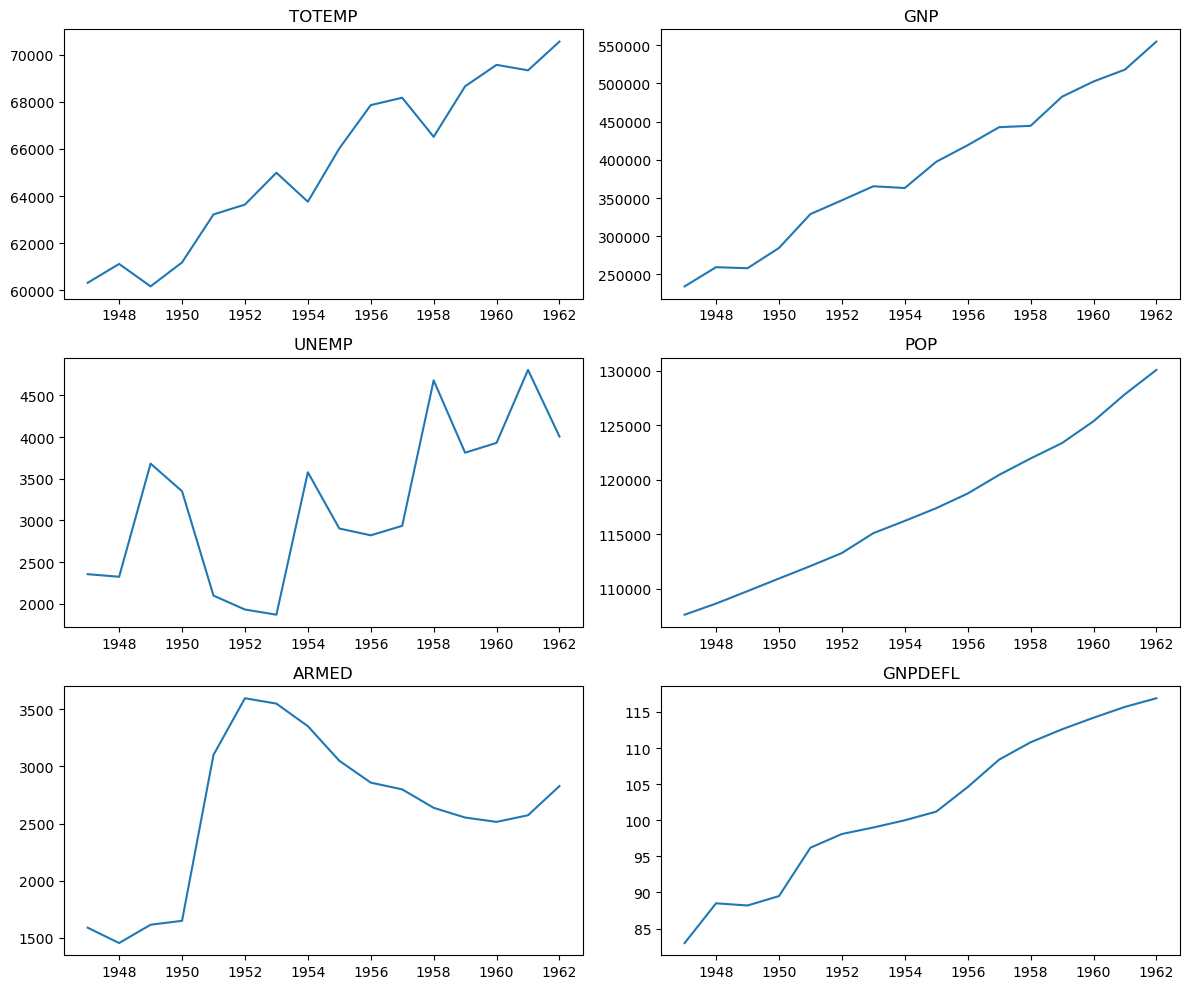

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

cols = ["TOTEMP", "GNP", "UNEMP", "POP", "ARMED", "GNPDEFL"]

for ax, col in zip(axes, cols):
    ax.plot(data["YEAR"], data[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [9]:
# Correlation heatmap

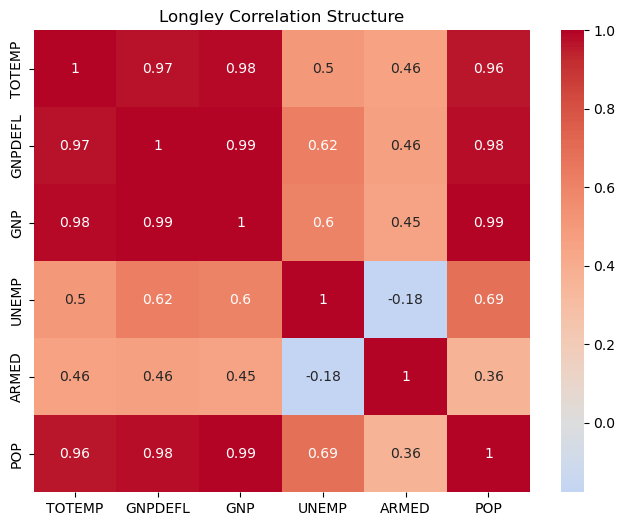

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data.drop(columns=["YEAR"]).corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Longley Correlation Structure")
plt.show()

In [11]:
# Demeaning by time

In [12]:
diff = data.sort_values("YEAR").diff().dropna()

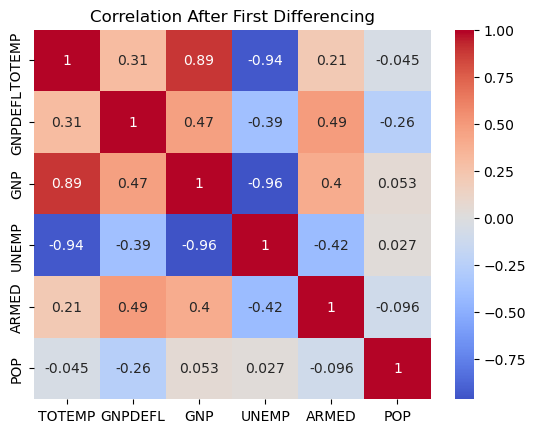

In [13]:
sns.heatmap(
    diff.drop(columns=["YEAR"]).corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation After First Differencing")
plt.show()

#### In small, trending macroeconomic datasets, strong correlations often reflect shared time dynamics rather than meaningful causal relationships, making naive regression analysis highly unstable and misleading.